In [1]:
#import dependencies
import keras
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Embedding
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#set hyperparameters
output_dir = 'model_output/dense'

#training
epochs = 4
batch_size = 128

#vector-space embedding
n_dim = 64
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 100
pad_type = trunc_type = 'pre'

#neural network architecture
n_dense = 64
dropout = 0.5

In [3]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words, skip_top=n_words_to_skip)

In [4]:
for x in x_train[0:6]:
    print(len(x))

218
189
141
550
147
43


In [5]:
x_train[0:6]

array([list([2, 2, 2, 2, 2, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 2, 256, 2, 2, 100, 2, 838, 112, 50, 670, 2, 2, 2, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 2, 2, 172, 4536, 1111, 2, 546, 2, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 71, 87, 2, 2, 2, 530, 2, 76, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 2, 2, 480, 66, 3785, 2, 2, 130, 2, 2, 2, 619, 2, 2, 124, 51, 2, 135, 2, 2, 1415, 2, 2, 2, 2, 215, 2, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 3766, 2, 723, 2, 71, 2, 530, 476, 2, 400, 317, 2, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 2, 2071, 56, 2, 141, 2, 194, 2, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 2, 2, 2, 51, 2, 2, 224, 92, 2, 104, 2, 226, 65, 2, 2, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 2, 2, 2, 2, 2, 178, 2]),
       list([2, 194, 1153, 194, 2, 78, 228, 2, 2, 1463, 4369, 2, 134, 2, 2, 715, 2, 118, 1634, 2, 394, 2, 2, 119, 954, 189, 102, 2, 20

In [6]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["PAD"] = 0
word_index["START"] = 1
word_index["UNK"] = 2
index_word = {v:k for k,v in word_index.items()}

In [7]:
#showing review with token replacement
' '.join(index_word[id] for id in x_train[0])

"UNK UNK UNK UNK UNK brilliant casting location scenery story direction everyone's really suited UNK part UNK played UNK UNK could UNK imagine being there robert UNK UNK UNK amazing actor UNK now UNK same being director UNK father came UNK UNK same scottish island UNK myself UNK UNK loved UNK fact there UNK UNK real connection UNK UNK UNK UNK witty remarks throughout UNK UNK were great UNK UNK UNK brilliant UNK much UNK UNK bought UNK UNK UNK soon UNK UNK UNK released UNK UNK UNK would recommend UNK UNK everyone UNK watch UNK UNK fly UNK UNK amazing really cried UNK UNK end UNK UNK UNK sad UNK UNK know what UNK say UNK UNK cry UNK UNK UNK UNK must UNK been good UNK UNK definitely UNK also UNK UNK UNK two little UNK UNK played UNK UNK UNK norman UNK paul UNK were UNK brilliant children UNK often left UNK UNK UNK UNK list UNK think because UNK stars UNK play them UNK grown up UNK such UNK big UNK UNK UNK whole UNK UNK these children UNK amazing UNK should UNK UNK UNK what UNK UNK done do

In [8]:
#showing unaltered review
(all_x_train,_), (all_x_valid,_) = imdb.load_data()
' '.join(index_word[id] for id in all_x_train[0])

"START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [9]:
#standardizing input length by padding and truncating
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [10]:
for x in x_train[0:5]:
    print(len(x))

100
100
100
100
100


In [11]:
' '.join(index_word[id] for id in x_train[5])

'PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD UNK begins better than UNK ends funny UNK UNK russian UNK crew UNK UNK other actors UNK UNK those scenes where documentary shots UNK UNK spoiler part UNK message UNK UNK contrary UNK UNK whole story UNK UNK does UNK UNK UNK UNK'

In [12]:
#dense sentiment classifier architecture
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
#model.add(Dense(n_dense, activation='relu'))
#model.add(Dropout(dropout))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
#Create an object and directory for checkpoint model parameters after each epoch
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists((output_dir)):
    os.makedirs(output_dir)

In [16]:
model.fit(x_train, y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(x_valid, y_valid),
          callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 2s 9ms/step - loss: 0.5278 - accuracy: 0.7176 - val_loss: 0.3506 - val_accuracy: 0.8428
Epoch 2/4
196/196 [==============================] - 2s 9ms/step - loss: 0.2632 - accuracy: 0.8967 - val_loss: 0.3584 - val_accuracy: 0.8416
Epoch 3/4
196/196 [==============================] - 2s 9ms/step - loss: 0.0965 - accuracy: 0.9721 - val_loss: 0.4559 - val_accuracy: 0.8293
Epoch 4/4
196/196 [==============================] - 2s 9ms/step - loss: 0.0182 - accuracy: 0.9977 - val_loss: 0.5604 - val_accuracy: 0.8292


In [17]:
model.load_weights(output_dir+"/weights.02.hdf5")

In [18]:
y_hat = model.predict_on_batch(x_valid)

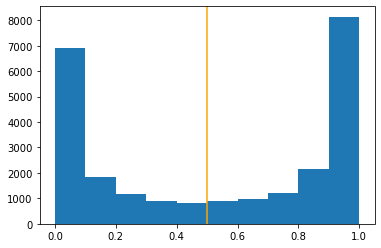

In [19]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [20]:
y_hat[0]

array([0.21568474], dtype=float32)

In [21]:
y_valid[0]

0

In [22]:
pct_auc = roc_auc_score(y_valid, y_hat) * 100
"{:0.2f}".format(pct_auc)

'92.52'

In [23]:
float_y_hat = []
for y in y_hat:
    float_y_hat.append(y[0])
ydf = pd.DataFrame(list(zip(float_y_hat, y_valid)),
                   columns=['y_hat', 'y']
                   )

ydf.head(10)

,y_hat,y
0,0.215685,0
1,0.978943,1
2,0.860594,1
3,0.621462,0
4,0.994623,1
5,0.832074,1
6,0.830340,1
7,0.007752,0
8,0.905869,0
9,0.920952,1


In [24]:
#ten cases of negative validation reviews with high y-hat scores
ydf[(ydf.y==0) & (ydf.y_hat > 0.9)].head(10)

,y_hat,y
8,0.905869,0
75,0.976914,0
139,0.929844,0
152,0.977019,0
328,0.908410,0
386,0.958839,0
390,0.934577,0
426,0.927641,0
438,0.911131,0
488,0.941720,0


In [25]:
#ten cases of positive validation reviews with low y-hat scores
ydf[(ydf.y==1) & (ydf.y_hat < 0.1)].head(10)

,y_hat,y
101,0.030787,1
224,0.088121,1
325,0.047273,1
333,0.098357,1
355,0.072669,1
535,0.096787,1
667,0.032992,1
1229,0.091160,1
1255,0.070093,1
1361,0.033909,1


In [26]:
' '.join(index_word[id] for id in x_valid[101])

"UNK UNK pretty damn good UNK UNK UNK thing UNK must UNK said UNK deals UNK UNK UNK UNK life UNK turkey very UNK that's exactly how UNK goes UNK scenes UNK UNK meant UNK scare UNK somewhat cheap UNK UNK most UNK them even UNK UNK UNK UNK UNK religion lesson scene made me laugh UNK tears UNK performs UNK best acting UNK UNK flick UNK UNK religion teacher UNK UNK UNK UNK UNK waste UNK your time go UNK watch UNK you'll find UNK rather amusing especially UNK UNK know turkey enough UNK relate UNK UNK school lives"